In [10]:
# https://medium.com/@himanshuit3036/supervised-learning-methods-using-python-bb85b8c4e0b7

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

import seaborn as sns
%matplotlib inline

In [11]:
ds = pd.read_csv("/Users/clara/Desktop/TESIS_I/DS_Final2.csv")
#le sumamos una columna donde ordenamos la varibla Campaña - Año para poder graficar correctamente
ds['Campaña-Año1'] = pd.to_datetime(ds['Campaña-Año'],format='%m-%Y') 
#me quedo con Campaña año 2018-03 en adelante ya que no hay registros anteriores a eso
ds_2018 = ds[(ds['Campaña-Año1']> '02-2018') &(ds['Año'] != 2022)]

In [12]:
ds.isna().sum()

Orden                         0
Sitios                        0
Gobierno_local                0
codigo                        0
Fecha                         0
Mes                           0
Año                           0
Año-mes                       0
Campaña-Año                   0
Campaña                       0
Tem_agua                      0
Tem_aire                      0
OD                            0
pH                            0
Turbiedad_NTU                 0
Olores                      580
Color                       590
Espumas                     583
Mat_susp                    586
colif_totales_ufc_100ml       0
colif_fecales_ufc_100ml       0
escher_coli_ufc_100ml         0
enteroc_ufc_100ml           591
Nitrato_mg_l                  0
NH4_mg_l                      0
P_de_ortof_mg_l               0
P_total_l_mg_l                0
DQO_mg_l                      0
DBO_mg_l                    415
Fosf_ortofos_mg_l             0
solidos_totales_mg_l       1131
Hidr_Der

In [13]:
ds= ds.fillna(ds.mean())  #completo los na de las variables numericas

/var/folders/n8/v1293tf10cj0htfq17tn2lgm0000gn/T/ipykernel_23999/1816028724.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  ds= ds.fillna(ds.mean())  #completo los na de las variables numericas
/var/folders/n8/v1293tf10cj0htfq17tn2lgm0000gn/T/ipykernel_23999/1816028724.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ds= ds.fillna(ds.mean())  #completo los na de las variables numericas


In [14]:
ds.isna().sum()

Orden                        0
Sitios                       0
Gobierno_local               0
codigo                       0
Fecha                        0
Mes                          0
Año                          0
Año-mes                      0
Campaña-Año                  0
Campaña                      0
Tem_agua                     0
Tem_aire                     0
OD                           0
pH                           0
Turbiedad_NTU                0
Olores                     580
Color                      590
Espumas                    583
Mat_susp                   586
colif_totales_ufc_100ml      0
colif_fecales_ufc_100ml      0
escher_coli_ufc_100ml        0
enteroc_ufc_100ml            0
Nitrato_mg_l                 0
NH4_mg_l                     0
P_de_ortof_mg_l              0
P_total_l_mg_l               0
DQO_mg_l                     0
DBO_mg_l                     0
Fosf_ortofos_mg_l            0
solidos_totales_mg_l         0
Hidr_Deriv_Petr_ug_l         0
Cr_total

In [15]:
ds = ds.apply(lambda x:x.fillna(x.value_counts().index[0]))#completo los na de las variables categoricas

In [16]:
ds.isna().sum()

Orden                      0
Sitios                     0
Gobierno_local             0
codigo                     0
Fecha                      0
Mes                        0
Año                        0
Año-mes                    0
Campaña-Año                0
Campaña                    0
Tem_agua                   0
Tem_aire                   0
OD                         0
pH                         0
Turbiedad_NTU              0
Olores                     0
Color                      0
Espumas                    0
Mat_susp                   0
colif_totales_ufc_100ml    0
colif_fecales_ufc_100ml    0
escher_coli_ufc_100ml      0
enteroc_ufc_100ml          0
Nitrato_mg_l               0
NH4_mg_l                   0
P_de_ortof_mg_l            0
P_total_l_mg_l             0
DQO_mg_l                   0
DBO_mg_l                   0
Fosf_ortofos_mg_l          0
solidos_totales_mg_l       0
Hidr_Deriv_Petr_ug_l       0
Cr_total_mg_l              0
Cd_total_mg_l              0
Microcistina_u

In [17]:
ds.isnull().sum()

Orden                      0
Sitios                     0
Gobierno_local             0
codigo                     0
Fecha                      0
Mes                        0
Año                        0
Año-mes                    0
Campaña-Año                0
Campaña                    0
Tem_agua                   0
Tem_aire                   0
OD                         0
pH                         0
Turbiedad_NTU              0
Olores                     0
Color                      0
Espumas                    0
Mat_susp                   0
colif_totales_ufc_100ml    0
colif_fecales_ufc_100ml    0
escher_coli_ufc_100ml      0
enteroc_ufc_100ml          0
Nitrato_mg_l               0
NH4_mg_l                   0
P_de_ortof_mg_l            0
P_total_l_mg_l             0
DQO_mg_l                   0
DBO_mg_l                   0
Fosf_ortofos_mg_l          0
solidos_totales_mg_l       0
Hidr_Deriv_Petr_ug_l       0
Cr_total_mg_l              0
Cd_total_mg_l              0
Microcistina_u

In [19]:
#divido entre categorica y numerica
ds_cat = ds[['codigo','Gobierno_local','Olores','Color','Espumas','Mat_susp','Calidad_de_agua']]
ds_num = ds[['Tem_agua','OD','pH','Turbiedad_NTU','escher_coli_ufc_100ml','Nitrato_mg_l','NH4_mg_l','P_total_l_mg_l','DBO_mg_l','Hidr_Deriv_Petr_ug_l','Cr_total_mg_l','Cd_total_mg_l','Microcistina_ug_l','Clorofila_a_ug_l','ICA']]

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ds_cat = ds_cat.apply(le.fit_transform)

In [21]:
ds_final = pd.concat([ds_cat,ds_num],axis=1)
ds_final.head()

,codigo,Gobierno_local,Olores,Color,Espumas,Mat_susp,Calidad_de_agua,Tem_agua,OD,pH,...,Nitrato_mg_l,NH4_mg_l,P_total_l_mg_l,DBO_mg_l,Hidr_Deriv_Petr_ug_l,Cr_total_mg_l,Cd_total_mg_l,Microcistina_ug_l,Clorofila_a_ug_l,ICA
0,0,0,0,0,0,2,1,0.0,9.72,7.25,...,4.50,9.74,0.0,9.402911,95.678112,6.424501,0.945634,0.718777,625.344309,0
1,9,2,0,0,0,2,1,25.0,5.73,7.70,...,3.80,9.43,0.0,9.402911,95.678112,6.424501,0.945634,0.718777,625.344309,0
2,10,1,0,0,0,2,1,10.0,0.80,7.90,...,2.17,9.17,0.0,9.402911,95.678112,6.424501,0.945634,0.718777,625.344309,0
3,37,9,0,0,0,2,1,0.0,3.12,8.13,...,2.60,8.99,0.0,9.402911,95.678112,6.424501,0.945634,0.718777,625.344309,0
4,30,8,0,0,0,2,1,24.0,8.04,7.85,...,13.10,8.93,0.0,9.402911,95.678112,6.424501,0.945634,0.718777,625.344309,0


In [22]:
ds_final['Calidad_de_agua'].unique()

array([1, 3, 0, 2])

In [23]:
# dependent and independent variables.

X = ds_final.drop(['Calidad_de_agua'], axis=1)
Y = ds_final['Calidad_de_agua']

In [24]:
#Now we will be taking 80% of the data as our training set, and remaining 20% as our test set.

X_train = np.array(X[0:int(0.80*len(X))])
Y_train = np.array(Y[0:int(0.80*len(Y))])
X_test = np.array(X[int(0.80*len(X)):])
Y_test = np.array(Y[int(0.80*len(Y)):])
len(X_train), len(Y_train), len(X_test), len(Y_test)

(964, 964, 241, 241)

In [25]:
#Algorithms Applications

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [26]:
#Now lt’s initialize them in respective variables

LR = LogisticRegression()
KNN = KNeighborsClassifier()
NB = GaussianNB()
LSVM = LinearSVC()
NLSVM = SVC(kernel='rbf')
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()

In [27]:
#Now that we have initialized all our algorithms, next step is to train our model on our Training Data Set:

LR_fit = LR.fit(X_train, Y_train)
KNN_fit = KNN.fit(X_train, Y_train)
NB_fit = NB.fit(X_train, Y_train)
LSVM_fit = LSVM.fit(X_train, Y_train)
NLSVM_fit = NLSVM.fit(X_train, Y_train)
DT_fit = DT.fit(X_train, Y_train)
RF_fit = RF.fit(X_train, Y_train)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [28]:
#now predict on the Test Data Set and compare the accuracy scores
LR_pred = LR_fit.predict(X_test)
KNN_pred = KNN_fit.predict(X_test)
NB_pred = NB_fit.predict(X_test)
LSVM_pred = LSVM_fit.predict(X_test)
NLSVM_pred = NLSVM_fit.predict(X_test)
DT_pred = DT_fit.predict(X_test)
RF_pred = RF_fit.predict(X_test)

In [29]:
#Accuracy Score
from sklearn.metrics import accuracy_score
print("Logistic Regression is %f percent accurate" % (accuracy_score(LR_pred, Y_test)*100))
print("KNN is %f percent accurate" % (accuracy_score(KNN_pred, Y_test)*100))
print("Naive Bayes is %f percent accurate" % (accuracy_score(NB_pred, Y_test)*100))
print("Linear SVMs is %f percent accurate" % (accuracy_score(LSVM_pred, Y_test)*100))
print("Non Linear SVMs is %f percent accurate" % (accuracy_score(NLSVM_pred, Y_test)*100))
print("Decision Trees is %f percent accurate" % (accuracy_score(DT_pred, Y_test)*100))
print("Random Forests is %f percent accurate" % (accuracy_score(RF_pred, Y_test)*100))

Logistic Regression is 68.879668 percent accurate
KNN is 63.900415 percent accurate
Naive Bayes is 43.153527 percent accurate
Linear SVMs is 25.311203 percent accurate
Non Linear SVMs is 51.867220 percent accurate
Decision Trees is 79.253112 percent accurate
Random Forests is 79.668050 percent accurate


In [33]:
len(RF_pred)

241

In [34]:
len(Y_test)

241

In [39]:
Y_test

array([3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 0, 1, 3, 3, 3, 0, 3, 3, 1, 1, 1, 1,
       3, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1,
       0, 3, 3, 3, 3, 3, 1, 1, 3, 1, 1, 2, 0, 0, 3, 3, 3, 0, 3, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1,
       0, 3, 0, 3, 3, 3, 0, 0, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0,
       3, 1, 1, 3, 1, 3, 3, 3, 1, 0, 3, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1,
       1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 3,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3])

In [40]:
RF_pred

array([3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 0, 3, 3, 3, 3, 3, 1,
       3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 1, 2, 0, 0, 3, 0, 0, 3, 3, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 0, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0,
       3, 1, 3, 3, 1, 3, 3, 3, 1, 0, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

[[  7   1   0  10]
 [  1 104   0  20]
 [  0   0   1   0]
 [  4  13   0  80]]


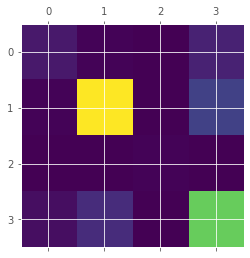

In [42]:
import sklearn.metrics as metrics

cm=metrics.confusion_matrix(Y_test,RF_pred)
print(cm)
plt.matshow(cm)

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, RF_pred)


array([[  7,   1,   0,  10],
       [  1, 104,   0,  20],
       [  0,   0,   1,   0],
       [  4,  13,   0,  80]])

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay




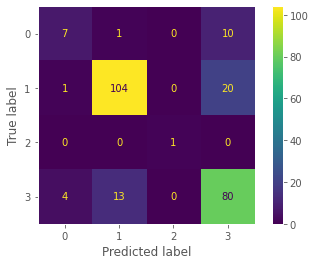

In [62]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.grid(False)
plt.show()

Se observa que el radom forest captura con una accuracy de 79,66 y como se ve en la matriz de confusión detecta correctamete la categoria 1, la 3 y cofunde un poco la 1 con la 3